In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import warnings
import joblib

warnings.filterwarnings("ignore")
sys.path.insert(0,'..')

from BMR.ml_models import *
from BMR.bmr import *

random.seed(0)
np.random.seed(0)

In [2]:
boston = load_boston()

X = boston.data
# drop categorical variables
X = X[:, [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12]]
y = boston.target.reshape(-1,1)

std_scaler = StandardScaler()
std_scaler_y = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
y_scaled = std_scaler_y.fit_transform(y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [3]:
scores, mapes, preds, models = run_methods(X_train, y_train, X_test, y_test, std_scaler_y=std_scaler_y)

In [4]:
print(scores)

[6.766581471651352, 6.44461824972023, 3.978473840173298, 4.1609028495163844, 5.030253220539964, 4.488130779095257]


In [5]:
print(mapes)

[0.20796710474978963, 0.20020471648389385, 0.11510044948781042, 0.1386756559899812, 0.15787609420902374, 0.1157693603619185]


In [10]:
print(f'RMSE(BMLR deg=1)/RMSE(RF): {scores[0]/scores[2]}')
print(f'RMSE(BMLR deg=1)/RMSE(SVR): {scores[0]/scores[3]}')
print(f'RMSE(BMLR deg=1)/RMSE(MARS): {scores[0]/scores[4]}')
print(f'RMSE(BMLR deg=1)/RMSE(CB): {scores[0]/scores[5]}')

print(f'RMSE(BMLR deg=2)/RMSE(RF): {scores[1]/scores[2]}')
print(f'RMSE(BMLR deg=2)/RMSE(SVR): {scores[1]/scores[3]}')
print(f'RMSE(BMLR deg=2)/RMSE(MARS): {scores[1]/scores[4]}')
print(f'RMSE(BMLR deg=2)/RMSE(CB): {scores[1]/scores[5]}')

RMSE(BMLR deg=1)/RMSE(RF): 1.7007982818247227
RMSE(BMLR deg=1)/RMSE(SVR): 1.6262291421771171
RMSE(BMLR deg=1)/RMSE(MARS): 1.345177106397241
RMSE(BMLR deg=1)/RMSE(CB): 1.5076613861540369
RMSE(BMLR deg=2)/RMSE(RF): 1.6198719681513625
RMSE(BMLR deg=2)/RMSE(SVR): 1.548850930386245
RMSE(BMLR deg=2)/RMSE(MARS): 1.2811717357299246
RMSE(BMLR deg=2)/RMSE(CB): 1.4359247907253212


(0.0, 60.0)

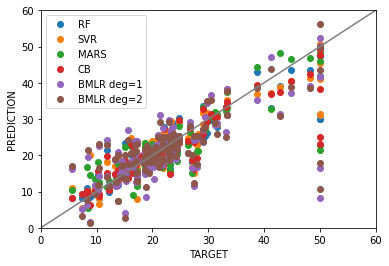

In [26]:
y_test_unsc = std_scaler_y.inverse_transform(y_test)
plt.plot(y_test_unsc, preds[2], 'o', label='RF')
plt.plot(y_test_unsc, preds[3], 'o', label='SVR')
plt.plot(y_test_unsc, preds[4], 'o', label='MARS')
plt.plot(y_test_unsc, preds[5], 'o', label='CB')
plt.plot(y_test_unsc, preds[0], 'o', label='BMLR deg=1')
plt.plot(y_test_unsc, preds[1], 'o', label='BMLR deg=2')
plt.plot([-10, 100], [-10, 100], '-', color='gray')
plt.legend()
plt.xlabel('TARGET')
plt.ylabel('PREDICTION')
plt.xlim((0, 60))
plt.ylim((0, 60))
plt.grid(linestyle='--')
plt.savefig(f'boston.pdf', bbox_inches='tight')

In [15]:
joblib.dump(preds, 'preds_boston.joblib')
joblib.dump(models, 'models_boston.joblib')

['preds_boston.joblib']